In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/imgs.zip

Streaming output truncated to the last 5000 lines.
  inflating: imgs/IO/IO400_82_img.png  
  inflating: imgs/IO/IO400_35_img.png  
  inflating: imgs/IO/IO804_41_img.png  
  inflating: imgs/IO/IO404_1_img.png  
  inflating: imgs/IO/IO402_68_img.png  
  inflating: imgs/IO/IO400_87_img.png  
  inflating: imgs/IO/IO500_40_img.png  
  inflating: imgs/IO/IO400_21_img.png  
  inflating: imgs/IO/IO704_67_img.png  
  inflating: imgs/IO/IO602_74_img.png  
  inflating: imgs/IO/IO502_86_img.png  
  inflating: imgs/IO/IO402_45_img.png  
  inflating: imgs/IO/IO504_70_img.png  
  inflating: imgs/IO/IO404_58_img.png  
  inflating: imgs/IO/IO400_58_img.png  
  inflating: imgs/IO/IO804_45_img.png  
  inflating: imgs/IO/IO802_52_img.png  
  inflating: imgs/IO/IO700_24_img.png  
  inflating: imgs/IO/IO804_97_img.png  
  inflating: imgs/IO/IO502_80_img.png  
  inflating: imgs/IO/IO604_83_img.png  
  inflating: imgs/IO/IO802_6_img.png  
  inflating: imgs/IO/IO604_34_img.png  
  inflating: imgs/IO/IO700_77_i

In [ ]:
from keras.preprocessing import image
import os

def load_images_from_path(path, label):
    images = []
    labels = []

    for file in os.listdir(path):
        images.append(image.img_to_array(image.load_img(os.path.join(path, file), target_size=(224, 224, 3))))
        labels.append((label))

    return images, labels

In [ ]:
from os import listdir

x = []
y = []
DRIVE_PATH = "/content/drive/MyDrive/cnn_img/"
class_labels = listdir(DRIVE_PATH)
print(class_labels)

for i in class_labels:
  images, labels = load_images_from_path(DRIVE_PATH+i, i)
  x += images
  y += labels

['Inner Ball Fault', 'Inner Outer Fault', 'Outer Ball Fault', 'Normal', 'Ball Fault', 'Outer Fault', 'Inner Fault']


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y = le.fit_transform(y)

In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.3, random_state=0)

x_train_norm = np.array(x_train) / 255
x_test_norm = np.array(x_test) / 255

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(7, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 128)       │          36,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │      18,875,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │           7,175 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,215,623 (73.30 MB)

 Trainable params: 19,215,623 (73.30 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
hist = model.fit(x_train_norm, y_train_encoded, validation_data=(x_test_norm, y_test_encoded), batch_size=10, epochs=20) # ran twice so 100 epochs

[]

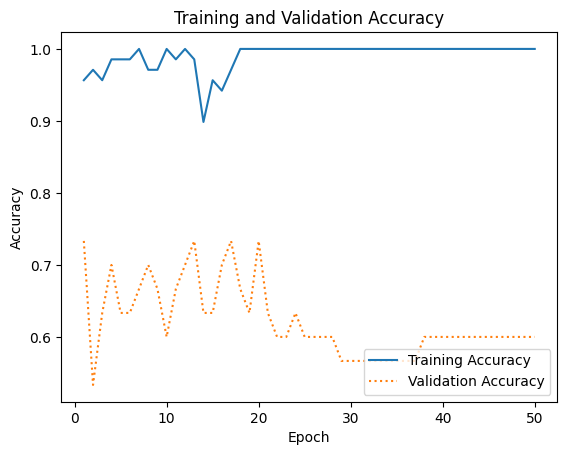

In [ ]:
import matplotlib.pyplot as plt
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict probabilities for test set
y_pred_prob = model.predict(x_test_norm)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test_encoded, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
class_report = classification_report(y_true, y_pred)

# Print classification report
print("\nClassification Report:")
print(class_report)


In [ ]:
print(hist.history['accuracy'][-1]*100)

88.40579986572266


In [ ]:
from google.colab import drive
from keras.preprocessing import image
from keras.applications import MobileNet
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D, Dense
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import os
# Load MobileNet model
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Build the model
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(1024, activation='relu'))
model.add(Dense(7, activation='softmax'))

# Freeze MobileNet layers
base_model.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Train the model
hist = model.fit(x_train_norm, y_train_encoded, epochs=10, batch_size=32, validation_data=(x_test_norm, y_test_encoded))


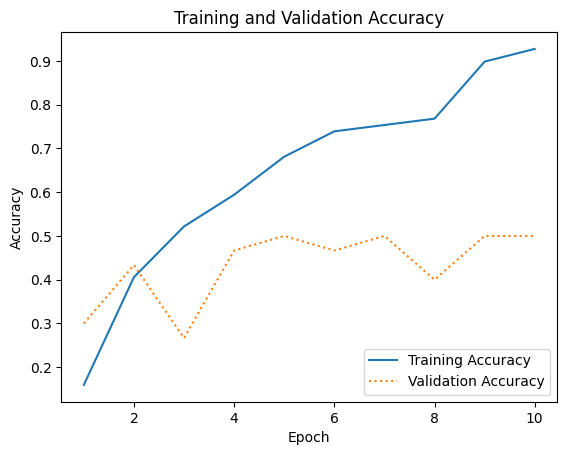

In [ ]:
# Plot accuracy
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
final_training_accuracy = hist.history['accuracy'][-1] * 100
print("Final Training Accuracy: {:.2f}%".format(final_training_accuracy))


Final Training Accuracy: 92.75%


In [ ]:
from keras.applications import ResNet50
from keras.layers import Flatten, Dense
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Assuming x_train_norm, x_test_norm, y_train_encoded, and y_test_encoded are defined before this code snippet

# Load ResNet50 pre-trained on ImageNet without the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom top layers for our classification task
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
output = Dense(6, activation='softmax')(x)

# Create the model
resnet_model = Model(inputs=base_model.input, outputs=output)

# Compile the model
resnet_model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
resnet_model.summary()

# Train the model
history = resnet_model.fit(x_train_norm, y_train_encoded, epochs=10, batch_size=32, validation_data=(x_test_norm, y_test_encoded))

# Plotting the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
